<a href="https://colab.research.google.com/github/QuanRy/ML_MiFi/blob/main/lab_1/ML_1_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

–ó–∞–≥—Ä—É–∑–∏–º –¥–∞–Ω–Ω—ã–µ

In [1]:
import pandas as pd

df = pd.read_csv("data_v1-06.csv")

print(df.head(10))

         x       y
0  0.01000  1.0145
1  0.03519  1.0203
2  0.06038  1.1508
3  0.08557  1.1833
4  0.11076  1.1797
5  0.13595  1.0025
6  0.16114  1.4880
7  0.18633  1.1090
8  0.21152  1.2097
9  0.23671  1.6791


In [2]:
# –£—Å—Ç–∞–Ω–æ–≤–∏–º –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [6]:
# –ü—Ä–æ–º–µ–∂—É—Ç–æ–∫ –¥–ª—è x –∏ y (–ø—Ä–æ—Å–º–æ—Ç—Ä–∏–º –∏—Ö –ø—Ä–µ–¥–µ–ª—ã)
x_min = df['x'].min()
x_max = df['x'].max()

y_min = df['y'].min()
y_max = df['y'].max()

print("\n–ü—Ä–æ–º–µ–∂—É—Ç–æ–∫ –¥–ª—è x: –æ—Ç", x_min, "–¥–æ", x_max)
print("–ü—Ä–æ–º–µ–∂—É—Ç–æ–∫ –¥–ª—è y: –æ—Ç", y_min, "–¥–æ", y_max)


–ü—Ä–æ–º–µ–∂—É—Ç–æ–∫ –¥–ª—è x: –æ—Ç 0.01 –¥–æ 2.0
–ü—Ä–æ–º–µ–∂—É—Ç–æ–∫ –¥–ª—è y: –æ—Ç 0.36834 –¥–æ 12.134


–û—Ç–æ–±—Ä–∞–∑–∏–º –¥–∞–Ω–Ω—ã–µ –≤ –≤–∏–¥–µ –≥—Ä–∞—Ñ–∏–∫–∞

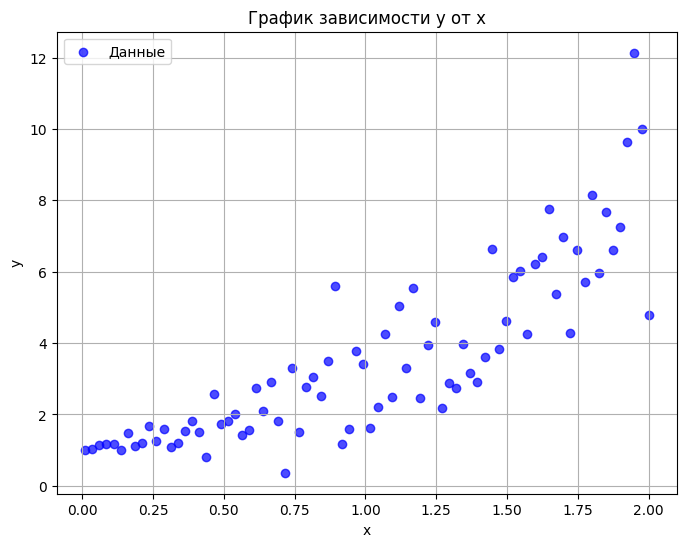

In [3]:
# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
plt.figure(figsize=(8, 6))
plt.scatter(df['x'], df['y'], color='blue', label='–î–∞–Ω–Ω—ã–µ', alpha=0.7)

# –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –ø–æ–¥–ø–∏—Å–µ–π
plt.title('–ì—Ä–∞—Ñ–∏–∫ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ y –æ—Ç x')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

# –ü–æ–∫–∞–∑–∞—Ç—å –≥—Ä–∞—Ñ–∏–∫
plt.show()

# **–ó–∞–¥–∞—á–∞ 1**

–ü–æ—Å—Ç—Ä–æ–∏—Ç—å –ø—Ä–æ—Å—Ç–µ–π—à—É—é –ª–∏–Ω–µ–π–Ω—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω–Ω—É—é –º–æ–¥–µ–ª—å, –∏—Å–ø–æ–ª—å–∑—É—è –º–µ—Ç–æ–¥ OLS, —Ä–∞—Å—Å—á–∏—Ç–∞—Ç—å –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏ –º–æ–¥–µ–ª–∏ –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –∏ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∞—Ö –∏ –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã –¥–ª—è —Ñ—É–Ω–∫—Ü–∏–∏ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ —Å –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–º–∏ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—è–º–∏ 90% –∏ 99%. –ù–∞ –¥–∏–∞–≥—Ä–∞–º–º–µ —Ä–∞—Å—Å–µ—è–Ω–∏—è –≤—ã–≤–µ—Å—Ç–∏ —Ä–∞—Å—Å—á–∏—Ç–∞–Ω–Ω—É—é —Ñ—É–Ω–∫—Ü–∏—é —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –∏ –≥—Ä–∞–Ω–∏—Ü—ã –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–≤.


In [ ]:
# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –≤—Ö–æ–¥–Ω–æ–π –∏ —Ü–µ–ª–µ–≤–æ–π –ø–∞—Ä–∞–º–µ—Ç—Ä—ã
X = df['x']
y = df['y']

# –î–æ–±–∞–≤–ª—è–µ–º –∫–æ–Ω—Å—Ç–∞–Ω—Ç–Ω—ã–π —Å—Ç–æ–ª–±–µ—Ü –¥–ª—è –º–æ–¥–µ–ª–∏ OLS
X = sm.add_constant(X)


In [ ]:
# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ –æ–±—É—á–∞—é—â—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫–∏
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ
model = sm.OLS(y_train, X_train).fit()

In [ ]:
# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –∏ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∞—Ö
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# –í—ã–≤–æ–¥ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤ –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏
r2_train = model.rsquared
r2_test = 1 - np.sum((y_test - y_test_pred)**2) / np.sum((y_test - np.mean(y_test))**2)

print("–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏ –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ:", r2_train)
print("–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ:", r2_test)

–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏ –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ: 0.712999257261091
–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.6732369282438528


In [ ]:
# –ü–æ–ª—É—á–µ–Ω–∏–µ –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã—Ö –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–≤
confidence_90 = model.get_prediction(X).conf_int(alpha=0.1)  # 90%
confidence_99 = model.get_prediction(X).conf_int(alpha=0.01)  # 99%

print("\n–î–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã 90%:")
print(confidence_90[:5])

print("\n–î–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã 99%:")
print(confidence_99[:5])


–î–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã 90%:
[[-0.66176026  0.59331634]
 [-0.55743847  0.67438928]
 [-0.45318994  0.75553549]
 [-0.34901894  0.83675923]
 [-0.24493008  0.9180651 ]]

–î–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã 99%:
[[-1.03538882  0.96694489]
 [-0.92414599  1.0410968 ]
 [-0.81302004  1.11536558]
 [-0.70201779  1.18975807]
 [-0.59114657  1.26428159]]


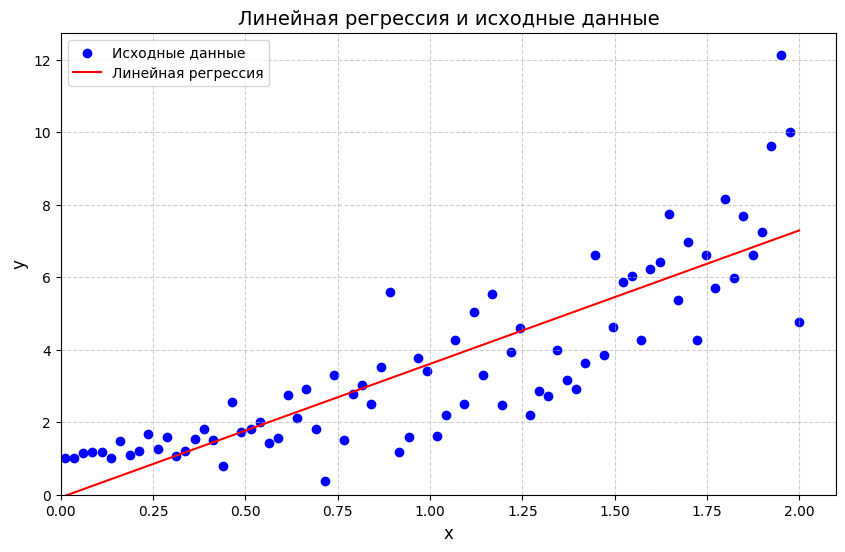

In [ ]:
# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏, –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –∏ –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã—Ö –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–≤
plt.figure(figsize=(10, 6))

# –î–∏–∞–≥—Ä–∞–º–º–∞ —Ä–∞—Å—Å–µ—è–Ω–∏—è –¥–ª—è –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
plt.scatter(df['x'], df['y'], label="–ò—Å—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ", color="blue")

# –õ–∏–Ω–∏—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
plt.plot(df['x'], model.predict(X), label="–õ–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è", color="red")

# –ü–æ–¥–ø–∏—Å–∏ –æ—Å–µ–π
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)

# –õ–µ–≥–µ–Ω–¥–∞, –≤—ã–Ω–µ—Å–µ–Ω–Ω–∞—è –≤ –ª–µ–≤—ã–π –≤–µ—Ä—Ö–Ω–∏–π —É–≥–æ–ª
plt.legend(loc="upper left", fontsize=10)

# –£—Å—Ç–∞–Ω–æ–≤–∫–∞ –Ω–∞—á–∞–ª–∞ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç —Å –Ω—É–ª—è
plt.xlim(left=0)
plt.ylim(bottom=0)

# –ó–∞–≥–æ–ª–æ–≤–æ–∫ –≥—Ä–∞—Ñ–∏–∫–∞
plt.title("–õ–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è –∏ –∏—Å—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ", fontsize=14)

# –°–µ—Ç–∫–∞
plt.grid(True, linestyle='--', alpha=0.6)

# –û—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
plt.show()


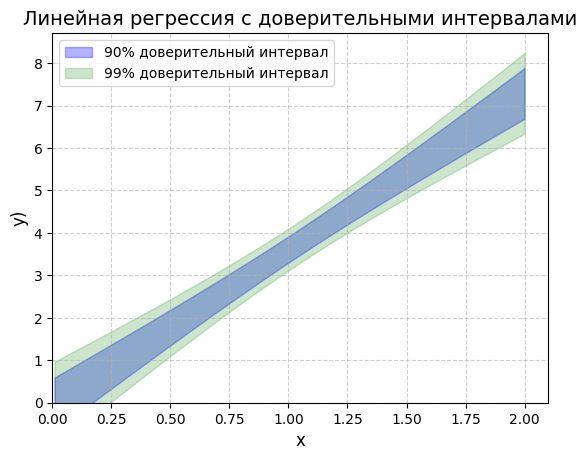

In [ ]:
# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã—Ö –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–≤
plt.fill_between(df['x'], confidence_90[:, 0], confidence_90[:, 1], color="blue", alpha=0.3, label="90% –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª")
plt.fill_between(df['x'], confidence_99[:, 0], confidence_99[:, 1], color="green", alpha=0.2, label="99% –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª")

# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –æ—Å–µ–π
plt.xlabel("x", fontsize=12)
plt.ylabel("y)", fontsize=12)

# –ü–æ–¥–ø–∏—Å—å –≥—Ä–∞—Ñ–∏–∫–∞
plt.title("–õ–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è —Å –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–º–∏ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞–º–∏", fontsize=14)

# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–Ω–æ–π —Å–∏—Å—Ç–µ–º—ã (–Ω–∞—á–∞–ª–æ —Å –Ω—É–ª—è)
plt.xlim(left=0)
plt.ylim(bottom=0)

# –õ–µ–≥–µ–Ω–¥–∞, –≤—ã–Ω–µ—Å–µ–Ω–Ω–∞—è –≤ –ª–µ–≤—ã–π –≤–µ—Ä—Ö–Ω–∏–π —É–≥–æ–ª
plt.legend(loc="upper left", fontsize=10)

# –°–µ—Ç–∫–∞
plt.grid(True, linestyle='--', alpha=0.6)

# –ü–æ–∫–∞–∑ –≥—Ä–∞—Ñ–∏–∫–∞
plt.show()

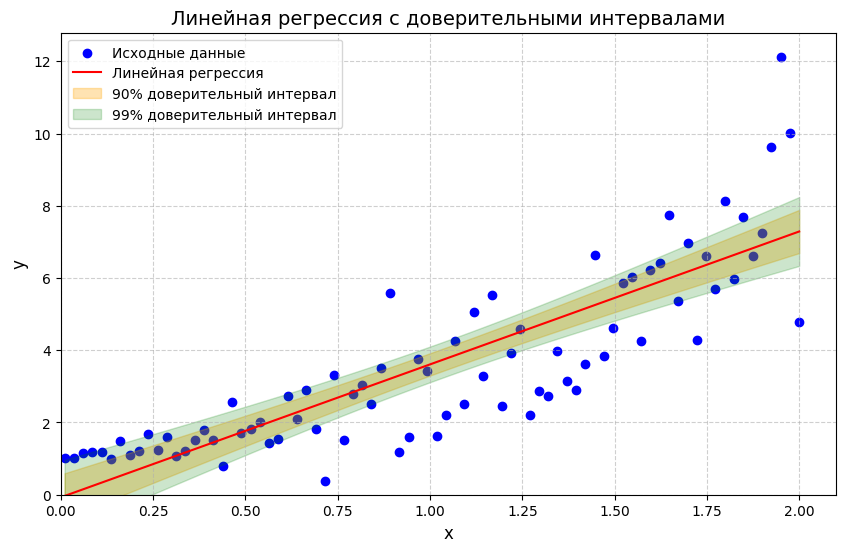

In [ ]:
# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏, –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –∏ –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã—Ö –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–≤
plt.figure(figsize=(10, 6))

# –î–∏–∞–≥—Ä–∞–º–º–∞ —Ä–∞—Å—Å–µ—è–Ω–∏—è –¥–ª—è –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
plt.scatter(df['x'], df['y'], label="–ò—Å—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ", color="blue")

# –õ–∏–Ω–∏—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
plt.plot(df['x'], model.predict(X), label="–õ–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è", color="red")

# –î–æ–±–∞–≤–ª–µ–Ω–∏–µ –≥—Ä–∞–Ω–∏—Ü –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã—Ö –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–≤
plt.fill_between(df['x'], confidence_90[:, 0], confidence_90[:, 1], color="orange", alpha=0.3, label="90% –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª")
plt.fill_between(df['x'], confidence_99[:, 0], confidence_99[:, 1], color="green", alpha=0.2, label="99% –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–π –∏–Ω—Ç–µ—Ä–≤–∞–ª")

# –ü–æ–¥–ø–∏—Å–∏ –æ—Å–µ–π
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)

# –õ–µ–≥–µ–Ω–¥–∞, –≤—ã–Ω–µ—Å–µ–Ω–Ω–∞—è –≤ –ª–µ–≤—ã–π –≤–µ—Ä—Ö–Ω–∏–π —É–≥–æ–ª
plt.legend(loc="upper left", fontsize=10)

# –£—Å—Ç–∞–Ω–æ–≤–∫–∞ –Ω–∞—á–∞–ª–∞ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç —Å –Ω—É–ª—è
plt.xlim(left=0)
plt.ylim(bottom=0)

# –ó–∞–≥–æ–ª–æ–≤–æ–∫ –≥—Ä–∞—Ñ–∏–∫–∞
plt.title("–õ–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è —Å –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–º–∏ –∏–Ω—Ç–µ—Ä–≤–∞–ª–∞–º–∏", fontsize=14)

# –°–µ—Ç–∫–∞
plt.grid(True, linestyle='--', alpha=0.6)

# –û—Ç–æ–±—Ä–∞–∂–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
plt.show()


# **–ó–∞–¥–∞—á–∞ 2**
–ü–æ—Å—Ç—Ä–æ–∏—Ç—å –≥—Ä–∞—Ñ–∏–∫–∏ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Å—Ç–∞—Ç–∫–æ–≤ –º–æ–¥–µ–ª–∏ –æ—Ç –º–æ–¥–µ–ª–∏—Ä—É–µ–º—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –∏ –æ—Ç –≤—Ö–æ–¥–Ω–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π, –ø—Ä–æ–≤–µ—Å—Ç–∏ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –Ω–∞ –≥–µ—Ç–µ—Ä–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å –æ—Å—Ç–∞—Ç–∫–æ–≤.

In [ ]:
# –í—ã—á–∏—Å–ª–µ–Ω–∏–µ –æ—Å—Ç–∞—Ç–∫–æ–≤
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

print("\n –û—Å—Ç–∞—Ç–∫–∏ –ø—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏:")
print(residuals_train[:5])

print("\n –û—Å—Ç–∞—Ç–∫–∏ –ø—Ä–∏ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–∏ 99%:")
print(residuals_test[:5])


 –û—Å—Ç–∞—Ç–∫–∏ –ø—Ä–∏ –æ–±—É—á–µ–Ω–∏–∏:
34    0.393011
62   -1.448389
42    0.405459
54   -1.808983
16    0.071564
dtype: float64

 –û—Å—Ç–∞—Ç–∫–∏ –ø—Ä–∏ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–∏ 99%:
30   -1.234299
0     1.048722
22   -0.572920
31   -0.062296
18    0.927469
dtype: float64


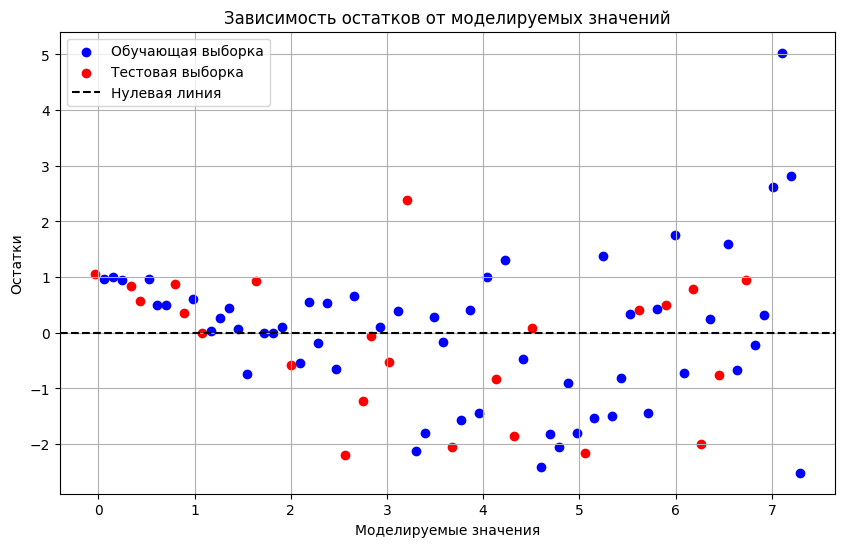

In [ ]:
# –ì—Ä–∞—Ñ–∏–∫ –æ—Å—Ç–∞—Ç–∫–æ–≤ –æ—Ç –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, residuals_train, color='blue', label='–û–±—É—á–∞—é—â–∞—è –≤—ã–±–æ—Ä–∫–∞')
plt.scatter(y_test_pred, residuals_test, color='red', label='–¢–µ—Å—Ç–æ–≤–∞—è –≤—ã–±–æ—Ä–∫–∞')
plt.axhline(0, color='black', linestyle='--', label='–ù—É–ª–µ–≤–∞—è –ª–∏–Ω–∏—è')
plt.xlabel("–ú–æ–¥–µ–ª–∏—Ä—É–µ–º—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è")
plt.ylabel("–û—Å—Ç–∞—Ç–∫–∏")
plt.title("–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –æ—Å—Ç–∞—Ç–∫–æ–≤ –æ—Ç –º–æ–¥–µ–ª–∏—Ä—É–µ–º—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π")
plt.legend()
plt.grid(True)
plt.show()

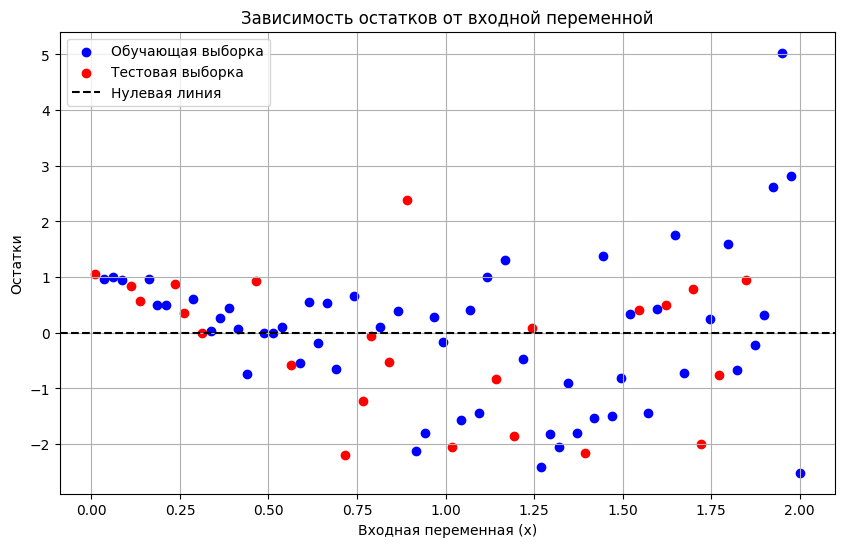

In [ ]:
# –ì—Ä–∞—Ñ–∏–∫ –æ—Å—Ç–∞—Ç–∫–æ–≤ –æ—Ç –≤—Ö–æ–¥–Ω–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π
plt.figure(figsize=(10, 6))
plt.scatter(X_train['x'], residuals_train, color='blue', label='–û–±—É—á–∞—é—â–∞—è –≤—ã–±–æ—Ä–∫–∞')
plt.scatter(X_test['x'], residuals_test, color='red', label='–¢–µ—Å—Ç–æ–≤–∞—è –≤—ã–±–æ—Ä–∫–∞')
plt.axhline(0, color='black', linestyle='--', label='–ù—É–ª–µ–≤–∞—è –ª–∏–Ω–∏—è')
plt.xlabel("–í—Ö–æ–¥–Ω–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è (x)")
plt.ylabel("–û—Å—Ç–∞—Ç–∫–∏")
plt.title("–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –æ—Å—Ç–∞—Ç–∫–æ–≤ –æ—Ç –≤—Ö–æ–¥–Ω–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π")
plt.legend()
plt.grid(True)
plt.show()

–ö–∞—á–µ—Å—Ç–≤–µ–Ω–Ω—ã–π –∞–Ω–∞–ª–∏–∑ –Ω–∞ –≥–µ—Ç–µ—Ä–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å –æ—Å—Ç–∞—Ç–∫–æ–≤

<ipython-input-20-656f4a5b8e55>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_variance = residuals_train.groupby(grouped).var()


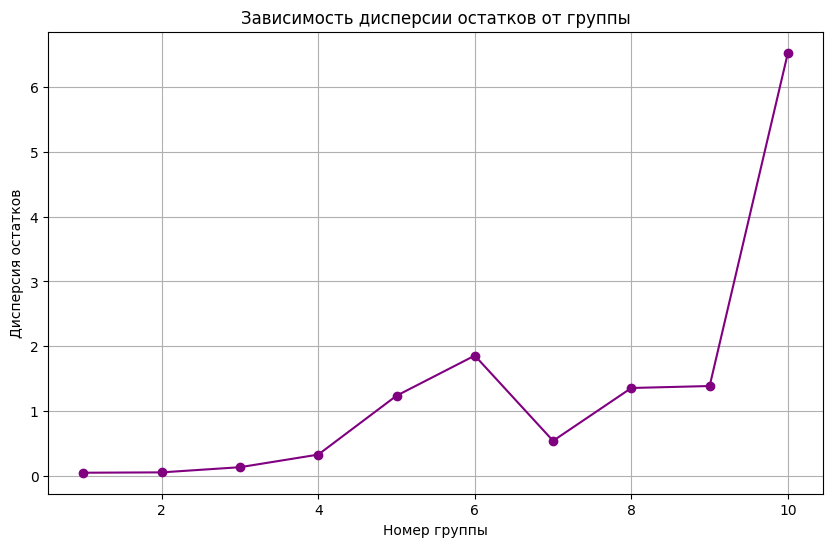

In [ ]:
grouped = pd.cut(df['x'], bins=num_groups, labels=range(1, num_groups+1))
group_variance = residuals_train.groupby(grouped).var()

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥—Ä–∞—Ñ–∏–∫–∞
plt.figure(figsize=(10, 6))
plt.plot(group_variance.index, group_variance, marker='o', linestyle='-', color='purple')
plt.xlabel("–ù–æ–º–µ—Ä –≥—Ä—É–ø–ø—ã")
plt.ylabel("–î–∏—Å–ø–µ—Ä—Å–∏—è –æ—Å—Ç–∞—Ç–∫–æ–≤")
plt.title("–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –¥–∏—Å–ø–µ—Ä—Å–∏–∏ –æ—Å—Ç–∞—Ç–∫–æ–≤ –æ—Ç –≥—Ä—É–ø–ø—ã")
plt.grid(True)
plt.show()


# –í –Ω–∞—á–∞–ª–µ –≥—Ä–∞—Ñ–∏–∫–∞ (–≥—Ä—É–ø–ø—ã 1-3):

–î–∏—Å–ø–µ—Ä—Å–∏—è –æ—Å—Ç–∞—Ç–∫–æ–≤ –æ—Å—Ç–∞–µ—Ç—Å—è –±–ª–∏–∑–∫–æ–π –∫ –Ω—É–ª—é. –≠—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ —Å—Ç–∞–±–∏–ª—å–Ω–æ–µ –ø–æ–≤–µ–¥–µ–Ω–∏–µ –æ—Å—Ç–∞—Ç–∫–æ–≤ –ø—Ä–∏ –Ω–µ–±–æ–ª—å—à–∏—Ö –∑–Ω–∞—á–µ–Ω–∏—è—Ö x.

# –°—Ä–µ–¥–Ω–∏–µ –≥—Ä—É–ø–ø—ã (–≥—Ä—É–ø–ø—ã 4-7):

–ù–∞–±–ª—é–¥–∞–µ—Ç—Å—è –ø–æ—Å—Ç–µ–ø–µ–Ω–Ω—ã–π —Ä–æ—Å—Ç –¥–∏—Å–ø–µ—Ä—Å–∏–∏ –æ—Å—Ç–∞—Ç–∫–æ–≤ —Å –ø–∏–∫–æ–º –≤ –≥—Ä—É–ø–ø–µ 6.
–≠—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ —Ç–æ–º, —á—Ç–æ –æ—Å—Ç–∞—Ç–∫–∏ –Ω–∞—á–∏–Ω–∞—é—Ç "—Ä–∞–∑–±—Ä–æ—Å–∞—Ç—å—Å—è" —Å–∏–ª—å–Ω–µ–µ –≤ —ç—Ç–æ–π –æ–±–ª–∞—Å—Ç–∏ –∑–Ω–∞—á–µ–Ω–∏–π x.

# –ö–æ–Ω–µ—Ü –≥—Ä–∞—Ñ–∏–∫–∞ (–≥—Ä—É–ø–ø—ã 8-10):

–î–∏—Å–ø–µ—Ä—Å–∏—è –æ—Å—Ç–∞—Ç–∫–æ–≤ —Ä–µ–∑–∫–æ –≤–æ–∑—Ä–∞—Å—Ç–∞–µ—Ç, –æ—Å–æ–±–µ–Ω–Ω–æ –≤ –≥—Ä—É–ø–ø–µ 10, –≥–¥–µ –¥–æ—Å—Ç–∏–≥–∞–µ—Ç—Å—è –Ω–∞–∏–±–æ–ª—å—à–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ.
–≠—Ç–æ —è–≤–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –≥–µ—Ç–µ—Ä–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç–∏ ‚Äî –æ—Å—Ç–∞—Ç–∫–∏ –º–æ–¥–µ–ª–∏ –≤–µ–¥—É—Ç —Å–µ–±—è –Ω–µ—Å—Ç–∞–±–∏–ª—å–Ω–æ –ø—Ä–∏ –±–æ–ª—å—à–∏—Ö –∑–Ω–∞—á–µ–Ω–∏—è—Ö x.

# –í—ã–≤–æ–¥:

–ù–∞ –æ—Å–Ω–æ–≤–µ –≥—Ä–∞—Ñ–∏–∫–∞ –º–æ–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥ –æ –Ω–∞–ª–∏—á–∏–∏ –≥–µ—Ç–µ—Ä–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç–∏ –æ—Å—Ç–∞—Ç–∫–æ–≤ –≤ –º–æ–¥–µ–ª–∏:

–î–∏—Å–ø–µ—Ä—Å–∏—è –æ—Å—Ç–∞—Ç–∫–æ–≤ –Ω–µ—Ä–∞–≤–Ω–æ–º–µ—Ä–Ω–∞: –æ–Ω–∞ —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç—Å—è –ø—Ä–∏ –ø–µ—Ä–µ—Ö–æ–¥–µ –∫ –±–æ–ª–µ–µ –≤—ã—Å–æ–∫–∏–º –∑–Ω–∞—á–µ–Ω–∏—è–º –≤—Ö–æ–¥–Ω–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π.
–ù–∞–∏–±–æ–ª—å—à–∏–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏—è –Ω–∞–±–ª—é–¥–∞—é—Ç—Å—è –≤ –≥—Ä—É–ø–ø–µ 10, —á—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ —Å—É—â–µ—Å—Ç–≤–µ–Ω–Ω—ã–µ –ø—Ä–æ–±–ª–µ–º—ã —Å –∞–¥–µ–∫–≤–∞—Ç–Ω–æ—Å—Ç—å—é –º–æ–¥–µ–ª–∏ –≤ —ç—Ç–æ–π –æ–±–ª–∞—Å—Ç–∏ –¥–∞–Ω–Ω—ã—Ö.

# **–ó–∞–¥–∞—á–∞ 3**
–ü–æ—Å—Ç—Ä–æ–∏—Ç—å –ø—Ä–æ—Å—Ç–µ–π—à—É—é –ª–∏–Ω–µ–π–Ω—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω–Ω—É—é –º–æ–¥–µ–ª—å –º–æ–¥—É–ª–µ–π –æ—Å—Ç–∞—Ç–∫–æ–≤ –Ω–∞ –≤—Ö–æ–¥–Ω—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é. –ü—Ä–æ–≤–µ—Ä–∏—Ç—å –∑–Ω–∞—á–∏–º–æ—Å—Ç—å –º–æ–¥–µ–ª–∏ (–ø—Ä–∏–≤–µ—Å—Ç–∏ —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫—É—é –≥–∏–ø–æ—Ç–µ–∑—É, –∑–Ω–∞—á–µ–Ω–∏–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –∫—Ä–∏—Ç–µ—Ä–∏—è, p value, —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–æ–µ —Ä–µ—à–µ–Ω–∏–µ). –°–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥ –æ –≥–µ—Ç–µ—Ä–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç–∏ –∏—Å—Ö–æ–¥–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.178
Method:                 Least Squares   F-statistic:                     18.12
Date:                Sat, 14 Dec 2024   Prob (F-statistic):           5.72e-05
Time:                        17:51:40   Log-Likelihood:                -93.433
No. Observations:                  80   AIC:                             190.9
Df Residuals:                      78   BIC:                             195.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3417      0.176      1.943      0.0

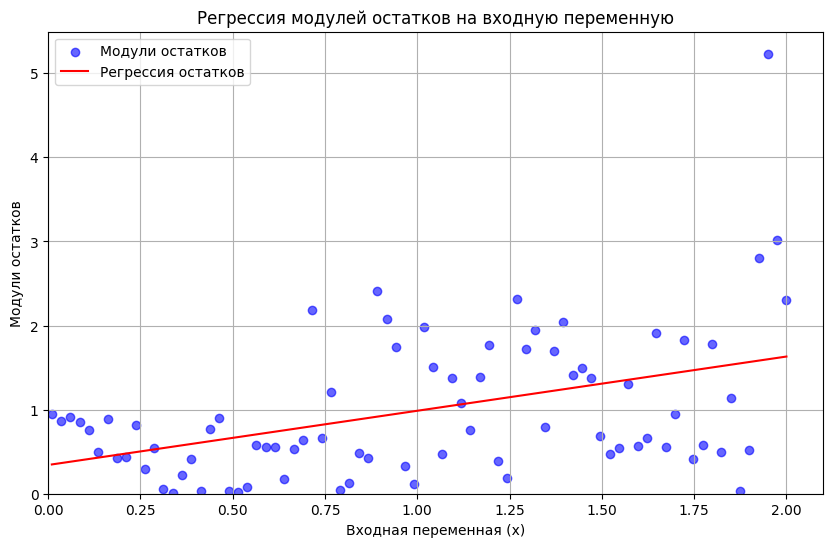


–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ç–µ—Å—Ç–∞ –ë—Ä–æ–π—à–∞-–ü–∞–≥–∞–Ω–∞:
LM statistic: 10.9924, p-value: 0.0009
F-statistic: 12.4249, p-value: 0.0007
–ì–µ—Ç–µ—Ä–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É–µ—Ç (–æ—Ç–≤–µ—Ä–≥–∞–µ–º H0)


In [25]:
# –ú–æ–¥–µ–ª—å –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
model = sm.OLS(y, X).fit()
residuals = abs(model.resid)  # –ú–æ–¥—É–ª–∏ –æ—Å—Ç–∞—Ç–∫–æ–≤

# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –æ—Å—Ç–∞—Ç–∫–æ–≤ –Ω–∞ –≤—Ö–æ–¥–Ω—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é
X_resid = sm.add_constant(df['x'])
model_resid = sm.OLS(residuals, X_resid).fit()

print(model_resid.summary())  # –ò—Ç–æ–≥–∏ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏ –æ—Å—Ç–∞—Ç–∫–æ–≤
plt.figure(figsize=(10, 6))
plt.scatter(df['x'], residuals, label='–ú–æ–¥—É–ª–∏ –æ—Å—Ç–∞—Ç–∫–æ–≤', color='blue', alpha=0.6)
plt.plot(df['x'], model_resid.predict(X_resid), label='–†–µ–≥—Ä–µ—Å—Å–∏—è –æ—Å—Ç–∞—Ç–∫–æ–≤', color='red')

# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –Ω–∞—á–∞–ª–∞ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç (–Ω–∞ –Ω–∞—á–∞–ª–æ)
plt.xlim(0, plt.xlim()[1])
plt.ylim(0, plt.ylim()[1])

plt.xlabel("–í—Ö–æ–¥–Ω–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è (x)")
plt.ylabel("–ú–æ–¥—É–ª–∏ –æ—Å—Ç–∞—Ç–∫–æ–≤")
plt.title("–†–µ–≥—Ä–µ—Å—Å–∏—è –º–æ–¥—É–ª–µ–π –æ—Å—Ç–∞—Ç–∫–æ–≤ –Ω–∞ –≤—Ö–æ–¥–Ω—É—é –ø–µ—Ä–µ–º–µ–Ω–Ω—É—é")
plt.legend()
plt.grid(True)
plt.show()

# –ü—Ä–æ–≤–µ—Ä–∫–∞ –≥–µ—Ç–µ—Ä–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç–∏ —Å –ø–æ–º–æ—â—å—é –∫—Ä–∏—Ç–µ—Ä–∏—è –ë—Ä–æ–π—à–∞-–ü–∞–≥–∞–Ω–∞ –∏–∑ statsmodels
from statsmodels.stats.diagnostic import het_breuschpagan

lm_test, lm_pvalue, fvalue, f_pvalue = het_breuschpagan(residuals, X_resid)

print("\n–†–µ–∑—É–ª—å—Ç–∞—Ç—ã —Ç–µ—Å—Ç–∞ –ë—Ä–æ–π—à–∞-–ü–∞–≥–∞–Ω–∞:")
print(f"LM statistic: {lm_test:.4f}, p-value: {lm_pvalue:.4f}")
print(f"F-statistic: {fvalue:.4f}, p-value: {f_pvalue:.4f}")

if lm_pvalue < 0.05:
    print("–ì–µ—Ç–µ—Ä–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É–µ—Ç (–æ—Ç–≤–µ—Ä–≥–∞–µ–º H0)")
else:
    print("–ì–µ—Ç–µ—Ä–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å –æ—Ç—Å—É—Ç—Å—Ç–≤—É–µ—Ç (–Ω–µ –æ—Ç–≤–µ—Ä–≥–∞–µ–º H0)")

# **–ó–∞–¥–∞—á–∞ 4**
–ü–æ—Å—Ç—Ä–æ–∏—Ç—å –ø—Ä–æ—Å—Ç–µ–π—à—É—é –ª–∏–Ω–µ–π–Ω—É—é —Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω–Ω—É—é –º–æ–¥–µ–ª—å, –∏—Å–ø–æ–ª—å–∑—É—è –º–µ—Ç–æ–¥ WLS, –≤ –∫–∞—á–µ—Å—Ç–≤–µ –≤–µ—Å–æ–≤ –Ω–∞–±–ª—é–¥–µ–Ω–∏–π –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å: –∞) –≤–µ–ª–∏—á–∏–Ω—ã, –æ–±—Ä–∞—Ç–Ω—ã–µ –º–æ–¥–µ–ª—å–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏—è–º —Ñ—É–Ω–∫—Ü–∏–∏ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏, –ø–æ—Å—Ç—Ä–æ–µ–Ω–Ω–æ–π –≤ –ø. 3; –±) –≤–µ–ª–∏—á–∏–Ω—ã, —Ä–∞–≤–Ω—ã–µ 1/x. –†–∞—Å—Å—á–∏—Ç–∞—Ç—å –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏ –º–æ–¥–µ–ª–µ–π –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –∏ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∞—Ö –∏ –≥—Ä–∞–Ω–∏—Ü—ã –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã—Ö –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–≤ –¥–ª—è —Ñ—É–Ω–∫—Ü–∏–∏ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏, —Å—Ä–∞–≤–Ω–∏—Ç—å –ø–æ—Å—Ç—Ä–æ–µ–Ω–Ω—ã–µ –º–æ–¥–µ–ª–∏ —Å –º–æ–¥–µ–ª—å—é, –ø–æ–ª—É—á–µ–Ω–Ω–æ–π –≤ –ø. 1.

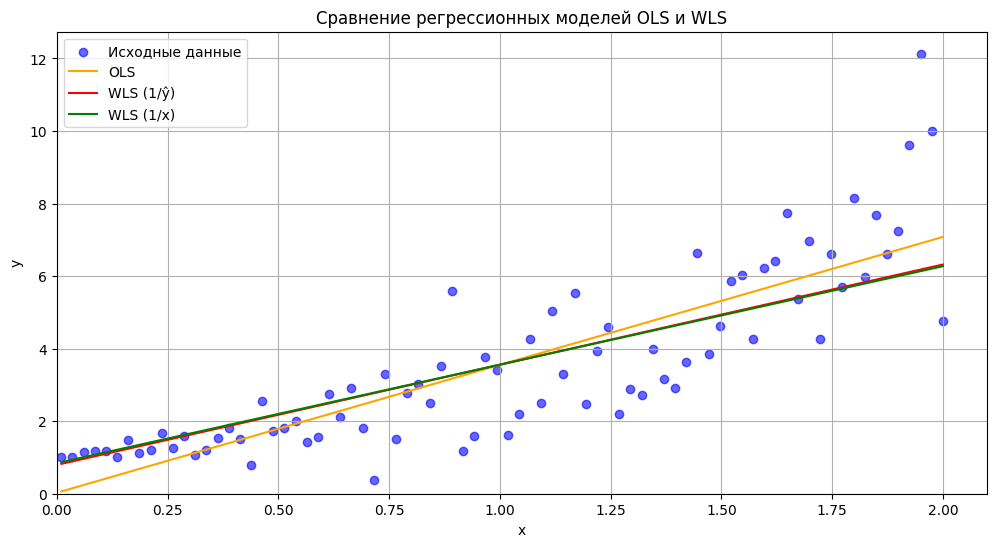

=== –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏ ===
OLS R¬≤: 0.7091
WLS (1/≈∑) R¬≤: 0.7703
WLS (1/x) R¬≤: 0.7774

=== –ì—Ä–∞–Ω–∏—Ü—ã –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã—Ö –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–≤ WLS (1/≈∑) ===
              0         1
const  0.591614  0.999741
x      2.421696  3.101687

=== –ì—Ä–∞–Ω–∏—Ü—ã –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã—Ö –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–≤ WLS (1/x) ===
              0         1
const  0.666056  1.019269
x      2.387449  3.042432

=== –ò—Ç–æ–≥–∏ –∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä–æ–≤–∫–∏ –æ—Å—Ç–∞—Ç–∫–æ–≤ ===
–°—Ä–µ–¥–Ω–∏–µ –∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –æ—Å—Ç–∞—Ç–∫–∏ –¥–ª—è WLS (1/≈∑): 6.827871601444713e-16
–°—Ä–µ–¥–Ω–∏–µ –∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –æ—Å—Ç–∞—Ç–∫–∏ –¥–ª—è WLS (1/x): 4.884981308350689e-16


In [28]:
# –®–∞–≥ 1: –ü—Ä–æ—Å—Ç–∞—è –ª–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è (OLS)
ols_model = sm.OLS(y, X).fit()
y_pred_ols = ols_model.predict(X)

# –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏ OLS
r2_ols = ols_model.rsquared

# –®–∞–≥ 2: WLS —Å –≤–µ—Å–∞–º–∏, –æ–±—Ä–∞—Ç–Ω—ã–º–∏ –º–æ–¥–µ–ª—å–Ω—ã–º –∑–Ω–∞—á–µ–Ω–∏—è–º OLS
# –ü—Ä–æ–≤–µ—Ä–∫–∞ –∏ –∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä–æ–≤–∫–∞ –≤–µ—Å–æ–≤ –Ω–∞ —Å–ª—É—á–∞–π –º–∞–ª—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
weights_a = 1 / np.maximum(y_pred_ols, 1e-8)
wls_model_a = sm.WLS(y, X, weights=weights_a).fit()
y_pred_wls_a = wls_model_a.predict(X)

# –®–∞–≥ 3: WLS —Å –≤–µ—Å–∞–º–∏, —Ä–∞–≤–Ω—ã–º–∏ 1/x
# –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ –¥–µ–ª–µ–Ω–∏–µ –Ω–∞ –Ω–æ–ª—å –∏ –∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä–æ–≤–∫–∞
weights_b = 1 / np.maximum(df['x'], 1e-8)
wls_model_b = sm.WLS(y, X, weights=weights_b).fit()
y_pred_wls_b = wls_model_b.predict(X)

# –®–∞–≥ 4: –ö–æ—Ä—Ä–µ–∫—Ç–∏—Ä–æ–≤–∫–∞ –æ—Å—Ç–∞—Ç–∫–æ–≤ —Å —É—á–µ—Ç–æ–º –≤–µ—Å–æ–≤
# –§–æ—Ä–º—É–ª–∞ Œµ*(x) = Œµ(x) * w(x)
residuals_a = (y - y_pred_wls_a) * weights_a
residuals_b = (y - y_pred_wls_b) * weights_b

# –®–∞–≥ 5: –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏ –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ
r2_wls_a = wls_model_a.rsquared
r2_wls_b = wls_model_b.rsquared



# –®–∞–≥ 6: –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
plt.figure(figsize=(12, 6))
plt.scatter(df['x'], y, label='–ò—Å—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ', color='blue', alpha=0.6)
plt.plot(df['x'], y_pred_ols, label='OLS', color='orange')
plt.plot(df['x'], y_pred_wls_a, label='WLS (1/≈∑)', color='red')
plt.plot(df['x'], y_pred_wls_b, label='WLS (1/x)', color='green')

# –ù–∞—Å—Ç—Ä–æ–π–∫–∞ –Ω–∞—á–∞–ª–∞ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç (–Ω–∞ –Ω–∞—á–∞–ª–æ)
plt.xlim(0, plt.xlim()[1])
plt.ylim(0, plt.ylim()[1])

plt.xlabel("x")
plt.ylabel("y")
plt.title("–°—Ä–∞–≤–Ω–µ–Ω–∏–µ —Ä–µ–≥—Ä–µ—Å—Å–∏–æ–Ω–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π OLS –∏ WLS")
plt.legend()
plt.grid(True)
plt.show()

# –®–∞–≥ 7: –ì—Ä–∞–Ω–∏—Ü—ã –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã—Ö –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–≤ –¥–ª—è WLS
ci_wls_a = wls_model_a.conf_int()
ci_wls_b = wls_model_b.conf_int()

# –®–∞–≥ 8: –í—ã–≤–æ–¥ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
print("=== –ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç—ã –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏ ===")
print(f"OLS R¬≤: {r2_ols:.4f}")
print(f"WLS (1/≈∑) R¬≤: {r2_wls_a:.4f}")
print(f"WLS (1/x) R¬≤: {r2_wls_b:.4f}")

print("\n=== –ì—Ä–∞–Ω–∏—Ü—ã –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã—Ö –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–≤ WLS (1/≈∑) ===")
print(ci_wls_a)

print("\n=== –ì—Ä–∞–Ω–∏—Ü—ã –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã—Ö –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–≤ WLS (1/x) ===")
print(ci_wls_b)

print("\n=== –ò—Ç–æ–≥–∏ –∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä–æ–≤–∫–∏ –æ—Å—Ç–∞—Ç–∫–æ–≤ ===")
print("–°—Ä–µ–¥–Ω–∏–µ –∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –æ—Å—Ç–∞—Ç–∫–∏ –¥–ª—è WLS (1/≈∑):", np.mean(residuals_a))
print("–°—Ä–µ–¥–Ω–∏–µ –∫–æ—Ä—Ä–µ–∫—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ –æ—Å—Ç–∞—Ç–∫–∏ –¥–ª—è WLS (1/x):", np.mean(residuals_b))

–ö–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç, –∫–∞–∫—É—é –¥–æ–ª—é –∏–∑–º–µ–Ω—á–∏–≤–æ—Å—Ç–∏ –∑–∞–≤–∏—Å–∏–º–æ–π –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π –æ–±—ä—è—Å–Ω—è–µ—Ç –º–æ–¥–µ–ª—å.

* OLS R¬≤ = 0.7091: –ë–∞–∑–æ–≤–∞—è –ª–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è –æ–±—ä—è—Å–Ω—è–µ—Ç 70.91% –∏–∑–º–µ–Ω—á–∏–≤–æ—Å—Ç–∏ –¥–∞–Ω–Ω—ã—Ö.
* WLS (1/≈∑) R¬≤ = 0.7703: –ú–æ–¥–µ–ª—å —Å –≤–µ—Å–∞–º–∏ 1/ùë¶ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç —É–ª—É—á—à–µ–Ω–∏–µ –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å OLS, –æ–±—ä—è—Å–Ω—è—è 77.03% –∏–∑–º–µ–Ω—á–∏–≤–æ—Å—Ç–∏ –¥–∞–Ω–Ω—ã—Ö.
* WLS (1/x) R¬≤ = 0.7774: –ú–æ–¥–µ–ª—å —Å –≤–µ—Å–∞–º–∏ 1/ùë• –¥–∞–µ—Ç –Ω–∞–∏–ª—É—á—à–∏–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç —Å—Ä–µ–¥–∏ —Ç—Ä–µ—Ö –º–æ–¥–µ–ª–µ–π ‚Äî 77.74% –æ–±—ä—è—Å–Ω–µ–Ω–Ω–æ–π –∏–∑–º–µ–Ω—á–∏–≤–æ—Å—Ç–∏.

–í—ã–≤–æ–¥:

–ú–æ–¥–µ–ª–∏ WLS, –æ—Å–æ–±–µ–Ω–Ω–æ —Å –≤–µ—Å–∞–º–∏ 1/ùë•, —É–ª—É—á—à–∞—é—Ç –∫–∞—á–µ—Å—Ç–≤–æ –ø–æ–¥–≥–æ–Ω–∫–∏ –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å OLS, —á—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ –∏—Ö –ª—É—á—à—É—é —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å —Å–ø—Ä–∞–≤–ª—è—Ç—å—Å—è —Å –≥–µ—Ç–µ—Ä–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å—é.


–î–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã –ø–æ–∫–∞–∑—ã–≤–∞—é—Ç, —Å –∫–∞–∫–æ–π —Ç–æ—á–Ω–æ—Å—Ç—å—é –æ—Ü–µ–Ω–µ–Ω—ã –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–∏.

–î–ª—è WLS (1/≈∑):
* const ‚àà [0.5916, 0.9997],
* x ‚àà [2.4217, 3.1017].
–î–ª—è WLS (1/x):
* const ‚àà [0.6661, 1.0193],
* x ‚àà [2.3874, 3.0424].

–í—ã–≤–æ–¥:

–û–±–µ –º–æ–¥–µ–ª–∏ WLS –∏–º–µ—é—Ç –±–æ–ª–µ–µ —É–∑–∫–∏–µ –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å OLS, —á—Ç–æ —Å–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤—É–µ—Ç –æ –±–æ–ª—å—à–µ–π —Ç–æ—á–Ω–æ—Å—Ç–∏ –æ—Ü–µ–Ω–æ–∫ –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–≤. –û–¥–Ω–∞–∫–æ –º–æ–¥–µ–ª—å —Å –≤–µ—Å–∞–º–∏ 1/x –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–µ–º–Ω–æ–≥–æ –±–æ–ª–µ–µ —É–∑–∫–∏–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã, —á–µ–º –º–æ–¥–µ–ª—å —Å –≤–µ—Å–∞–º–∏ 1/≈∑.

### –í—ã–≤–æ–¥:
–ú–æ–¥–µ–ª—å WLS —Å –≤–µ—Å–∞–º–∏ 1/ùë• —è–≤–ª—è–µ—Ç—Å—è –Ω–∞–∏–±–æ–ª–µ–µ –ø—Ä–µ–¥–ø–æ—á—Ç–∏—Ç–µ–ª—å–Ω–æ–π, —Ç–∞–∫ –∫–∞–∫:

1. –û–±–ª–∞–¥–∞–µ—Ç –Ω–∞–∏–±–æ–ª—å—à–∏–º –∫–æ—ç—Ñ—Ñ–∏—Ü–∏–µ–Ω—Ç–æ–º –¥–µ—Ç–µ—Ä–º–∏–Ω–∞—Ü–∏–∏ ùëÖ^2= 0.7774
2. –ò–º–µ–µ—Ç –±–æ–ª–µ–µ —É–∑–∫–∏–µ –¥–æ–≤–µ—Ä–∏—Ç–µ–ª—å–Ω—ã–µ –∏–Ω—Ç–µ—Ä–≤–∞–ª—ã.
3. –≠—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ —É—á–∏—Ç—ã–≤–∞–µ—Ç –≥–µ—Ç–µ—Ä–æ—Å–∫–µ–¥–∞—Å—Ç–∏—á–Ω–æ—Å—Ç—å –∑–∞ —Å—á–µ—Ç –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏—è 1/x –≤ –∫–∞—á–µ—Å—Ç–≤–µ –≤–µ—Å–æ–≤.

# **–ó–∞–¥–∞—á–∞ 5**
–ü–æ—Å—Ç—Ä–æ–∏—Ç—å –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º—ã —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –æ—Å—Ç–∞—Ç–∫–æ–≤ –º–æ–¥–µ–ª–µ–π, –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö –≤ –ø–ø. 1 –∏ 4, –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –∏ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∞—Ö, –ø—Ä–æ–≤–µ—Ä–∏—Ç—å —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –æ—Å—Ç–∞—Ç–∫–æ–≤ –Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å, –∏—Å–ø–æ–ª—å–∑—É—è –∫—Ä–∏—Ç–µ—Ä–∏–π ¬´—Ö–∏-–∫–≤–∞–¥—Ä–∞—Ç¬ª (–ø—Ä–∏–≤–µ—Å—Ç–∏ –∑–Ω–∞—á–µ–Ω–∏—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –∫—Ä–∏—Ç–µ—Ä–∏—è, p-value, —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–æ–µ —Ä–µ—à–µ–Ω–∏–µ).

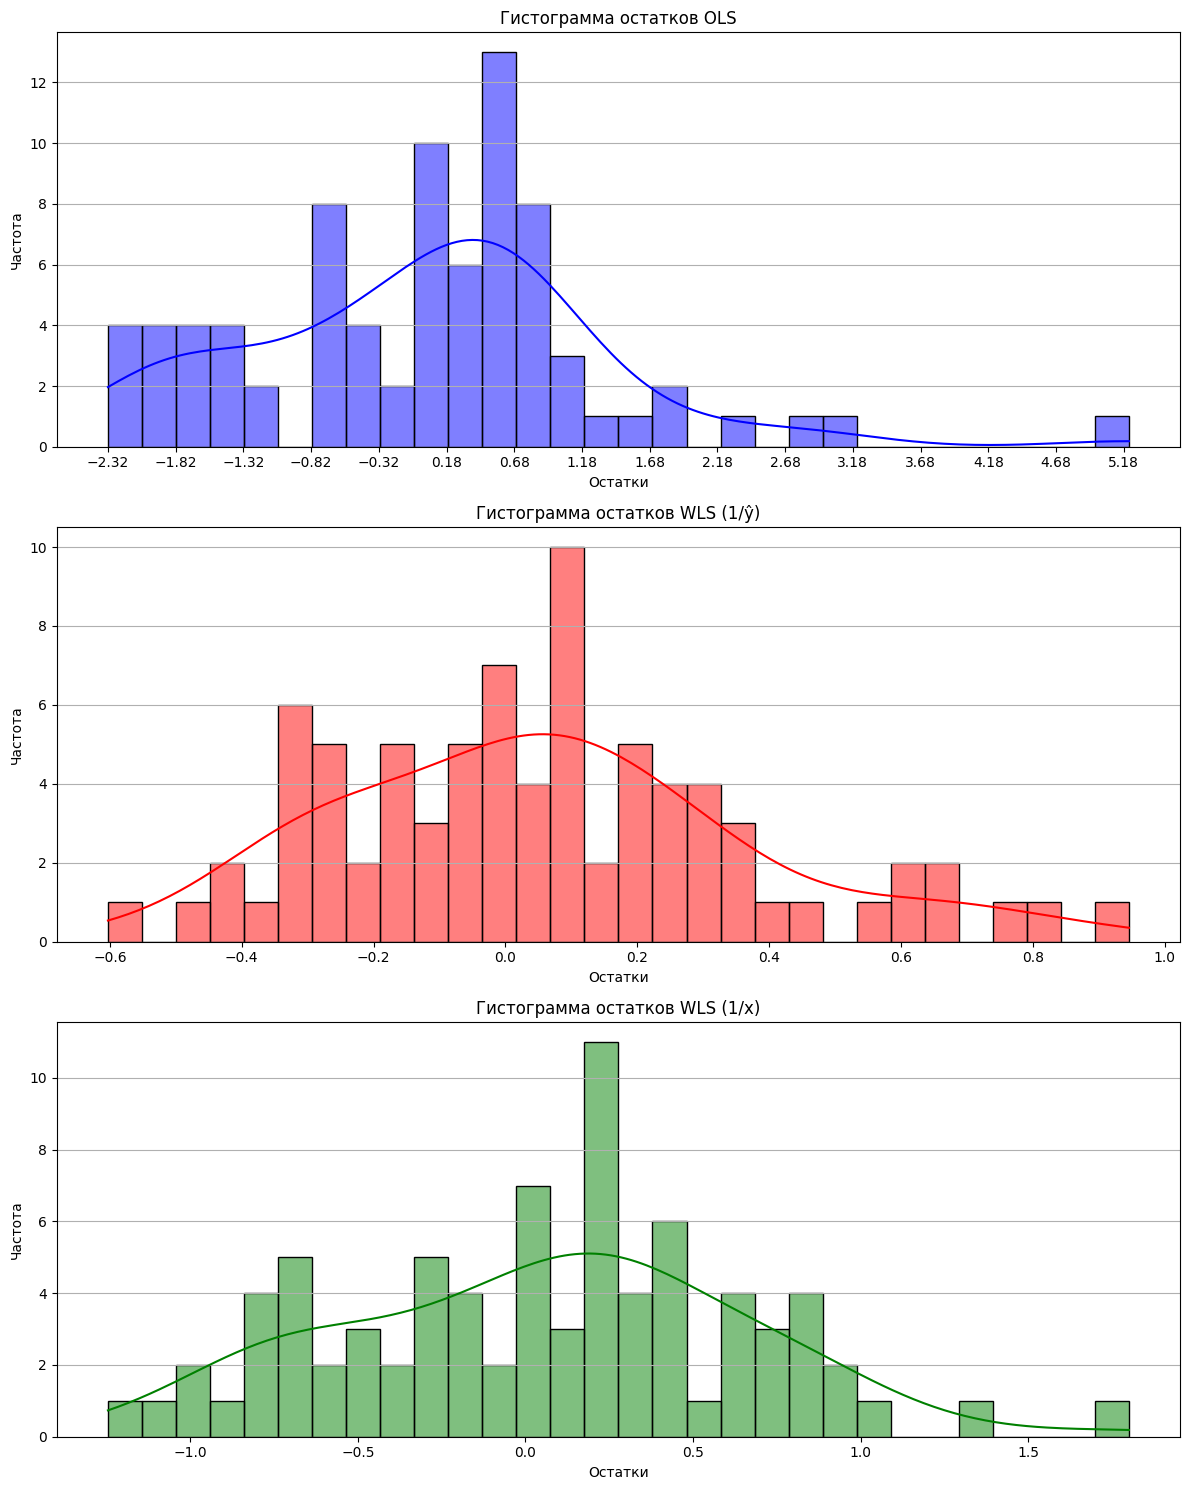

–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Å—Ç–∞—Ç–∫–æ–≤ OLS –æ—Ç–∫–ª–æ–Ω—è–µ—Ç—Å—è –æ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ (p-value = 0.0014)
–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Å—Ç–∞—Ç–∫–æ–≤ WLS (1/≈∑) –Ω–µ –æ—Ç–∫–ª–æ–Ω—è–µ—Ç—Å—è –æ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ (p-value = 0.1129)
–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Å—Ç–∞—Ç–∫–æ–≤ WLS (1/x) –Ω–µ –æ—Ç–∫–ª–æ–Ω—è–µ—Ç—Å—è –æ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ (p-value = 0.6629)


In [68]:
# –®–∞–≥ 1: –ü—Ä–æ—Å—Ç–∞—è –ª–∏–Ω–µ–π–Ω–∞—è —Ä–µ–≥—Ä–µ—Å—Å–∏—è (OLS)
ols_model = sm.OLS(y, X).fit()
y_pred_ols = ols_model.predict(X)

# –®–∞–≥ 2: WLS —Å –≤–µ—Å–∞–º–∏, –æ–±—Ä–∞—Ç–Ω—ã–º–∏ –º–æ–¥–µ–ª–∏ OLS
c = 1  # –ö–æ–Ω—Å—Ç–∞–Ω—Ç–∞ –¥–ª—è –≤–µ—Å–æ–≤
weights_a = 1 / (c + np.maximum(y_pred_ols, 1e-8))  # –ö–æ—Ä—Ä–µ–∫—Ç–∏—Ä—É–µ–º –≤–µ—Å–∞ –ø–æ —Ñ–æ—Ä–º—É–ª–µ
wls_model_a = sm.WLS(y, X, weights=weights_a).fit()
y_pred_wls_a = wls_model_a.predict(X)

# –®–∞–≥ 3: WLS —Å –≤–µ—Å–∞–º–∏, —Ä–∞–≤–Ω—ã–º–∏ 1/x
weights_b = 1 / (c + np.maximum(df['x'], 1e-8))  # –ö–æ—Ä—Ä–µ–∫—Ç–∏—Ä—É–µ–º –≤–µ—Å–∞ –ø–æ —Ñ–æ—Ä–º—É–ª–µ
wls_model_b = sm.WLS(y, X, weights=weights_b).fit()
y_pred_wls_b = wls_model_b.predict(X)

# –ö–æ—Ä—Ä–µ–∫—Ü–∏—è –æ—Å—Ç–∞—Ç–∫–æ–≤ —Å —É—á–µ—Ç–æ–º –≤–µ—Å–æ–≤
residuals_ols = y - y_pred_ols
residuals_a = (y - y_pred_wls_a) * weights_a
residuals_b = (y - y_pred_wls_b) * weights_b

# –®–∞–≥ 4: –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –≥–∏—Å—Ç–æ–≥—Ä–∞–º–º —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –æ—Å—Ç–∞—Ç–∫–æ–≤
plt.figure(figsize=(12, 15))

# OLS –æ—Å—Ç–∞—Ç–∫–∏ –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ
plt.subplot(3, 1, 1)
sns.histplot(residuals_ols, kde=True, color='blue', bins=30)
plt.title('–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ –æ—Å—Ç–∞—Ç–∫–æ–≤ OLS')
plt.xlabel('–û—Å—Ç–∞—Ç–∫–∏')
plt.ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
plt.grid(True, axis='y')
plt.xticks(np.arange(min(residuals_ols), max(residuals_ols), step=0.5))  # –ß–∞—Å—Ç—ã–µ –º–µ—Ç–∫–∏ –Ω–∞ –æ—Å–∏ X

# WLS (1/≈∑) –æ—Å—Ç–∞—Ç–∫–∏ –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ
plt.subplot(3, 1, 2)
sns.histplot(residuals_a, kde=True, color='red', bins=30)
plt.title('–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ –æ—Å—Ç–∞—Ç–∫–æ–≤ WLS (1/≈∑)')
plt.xlabel('–û—Å—Ç–∞—Ç–∫–∏')
plt.ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
plt.grid(True, axis='y')

# WLS (1/x) –æ—Å—Ç–∞—Ç–∫–∏ –Ω–∞ –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–µ
plt.subplot(3, 1, 3)
sns.histplot(residuals_b, kde=True, color='green', bins=30)
plt.title('–ì–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ –æ—Å—Ç–∞—Ç–∫–æ–≤ WLS (1/x)')
plt.xlabel('–û—Å—Ç–∞—Ç–∫–∏')
plt.ylabel('–ß–∞—Å—Ç–æ—Ç–∞')
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()

# –®–∞–≥ 5: –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç—å —Å –ø–æ–º–æ—â—å—é —Ç–µ—Å—Ç–∞ –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞
def shapiro_test(residuals):
    stat, p_value = stats.shapiro(residuals)
    return stat, p_value

# –ü—Ä–∏–º–µ–Ω—è–µ–º —Ç–µ—Å—Ç –®–∞–ø–∏—Ä–æ-–£–∏–ª–∫–∞
stat_ols, p_value_ols = shapiro_test(residuals_ols)
stat_a, p_value_a = shapiro_test(residuals_a)
stat_b, p_value_b = shapiro_test(residuals_b)

# –®–∞–≥ 6: –í—ã–≤–æ–¥ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –∫—Ä–∏—Ç–µ—Ä–∏—è –∏ p-value
alpha = 0.05  # –£—Ä–æ–≤–µ–Ω—å –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏
for name, stat, p_value in [("OLS", stat_ols, p_value_ols),
                            ("WLS (1/≈∑)", stat_a, p_value_a),
                            ("WLS (1/x)", stat_b, p_value_b)]:
    if p_value < alpha:
        print(f"–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Å—Ç–∞—Ç–∫–æ–≤ {name} –æ—Ç–∫–ª–æ–Ω—è–µ—Ç—Å—è –æ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ (p-value = {p_value:.4f})")
    else:
        print(f"–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Å—Ç–∞—Ç–∫–æ–≤ {name} –Ω–µ –æ—Ç–∫–ª–æ–Ω—è–µ—Ç—Å—è –æ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ (p-value = {p_value:.4f})")


# **–ó–∞–¥–∞—á–∞ 6**
–°–¥–µ–ª–∞—Ç—å –≤—ã–≤–æ–¥—ã –ø–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º —Å—Ä–∞–≤–Ω–µ–Ω–∏—è –º–µ—Ç–æ–¥–æ–≤ OLS –∏ WLS.

## –í—ã–≤–æ–¥

–ú–µ—Ç–æ–¥ WLS —Å –≤–µ—Å–∞–º–∏, —Ä–∞–≤–Ω—ã–º–∏ 1/x –∏–ª–∏ 1/≈∑, –ø–æ–∫–∞–∑–∞–ª –ª—É—á—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã –≤ –ø–ª–∞–Ω–µ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –æ—Å—Ç–∞—Ç–∫–æ–≤ –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å OLS.

–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Å—Ç–∞—Ç–∫–æ–≤ OLS –æ—Ç–∫–ª–æ–Ω—è–µ—Ç—Å—è –æ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ (p-value = 0.0014), —á—Ç–æ —É–∫–∞–∑—ã–≤–∞–µ—Ç –Ω–∞ –Ω–∞—Ä—É—à–µ–Ω–∏–µ –ø—Ä–µ–¥–ø–æ–ª–æ–∂–µ–Ω–∏–π –æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ—Å—Ç–∏, –≤–∞–∂–Ω—ã—Ö –¥–ª—è –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ—Å—Ç–∏ –º–æ–¥–µ–ª–∏.

–í —Ç–æ –≤—Ä–µ–º—è –∫–∞–∫ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –æ—Å—Ç–∞—Ç–∫–æ–≤ WLS —Å –≤–µ—Å–∞–º–∏ 1/≈∑ –Ω–µ –æ—Ç–∫–ª–æ–Ω—è–µ—Ç—Å—è –æ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ (p-value = 0.1129), –∞ –º–æ–¥–µ–ª—å WLS —Å –≤–µ—Å–∞–º–∏ 1/x –∏–º–µ–µ—Ç –µ—â–µ –±–æ–ª–µ–µ –±–ª–∞–≥–æ–ø—Ä–∏—è—Ç–Ω—ã–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç —Å p-value = 0.6629, —á—Ç–æ —Å–≤–∏–¥–µ—Ç–µ–ª—å—Å—Ç–≤—É–µ—Ç –æ —Ö–æ—Ä–æ—à–µ–º —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–∏ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—é.

–í —Ü–µ–ª–æ–º, –º–µ—Ç–æ–¥ WLS —Å –≤–µ—Å–∞–º–∏ 1/x –∏ 1/≈∑ –¥–∞–µ—Ç —Å—Ö–æ–∂–∏–µ —Ö–æ—Ä–æ—à–∏–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã, –æ–¥–Ω–∞–∫–æ –º–µ—Ç–æ–¥ WLS —Å –≤–µ—Å–∞–º–∏ 1/x –∏–º–µ–µ—Ç –Ω–∞–∏–ª—É—á—à–∏–µ –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏.
